In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df=load_breast_cancer()
df


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
x=df.data

In [ ]:
y=df.target

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_new=to_categorical(y)
y_new

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#Now we are going to train dataset and test it

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=0.25)

#creating architecture design

In [ ]:

from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
model=Sequential()

#input  dimension 4 neuron

In [ ]:
model.add(Dense(5,input_dim=4,activation="relu"))
model.add(Dense(2,input_dim=4,activation="relu"))
model.add(Dense(4,input_dim=4,activation="relu"))
model.add(Dense(3,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

#creating file for model to save it

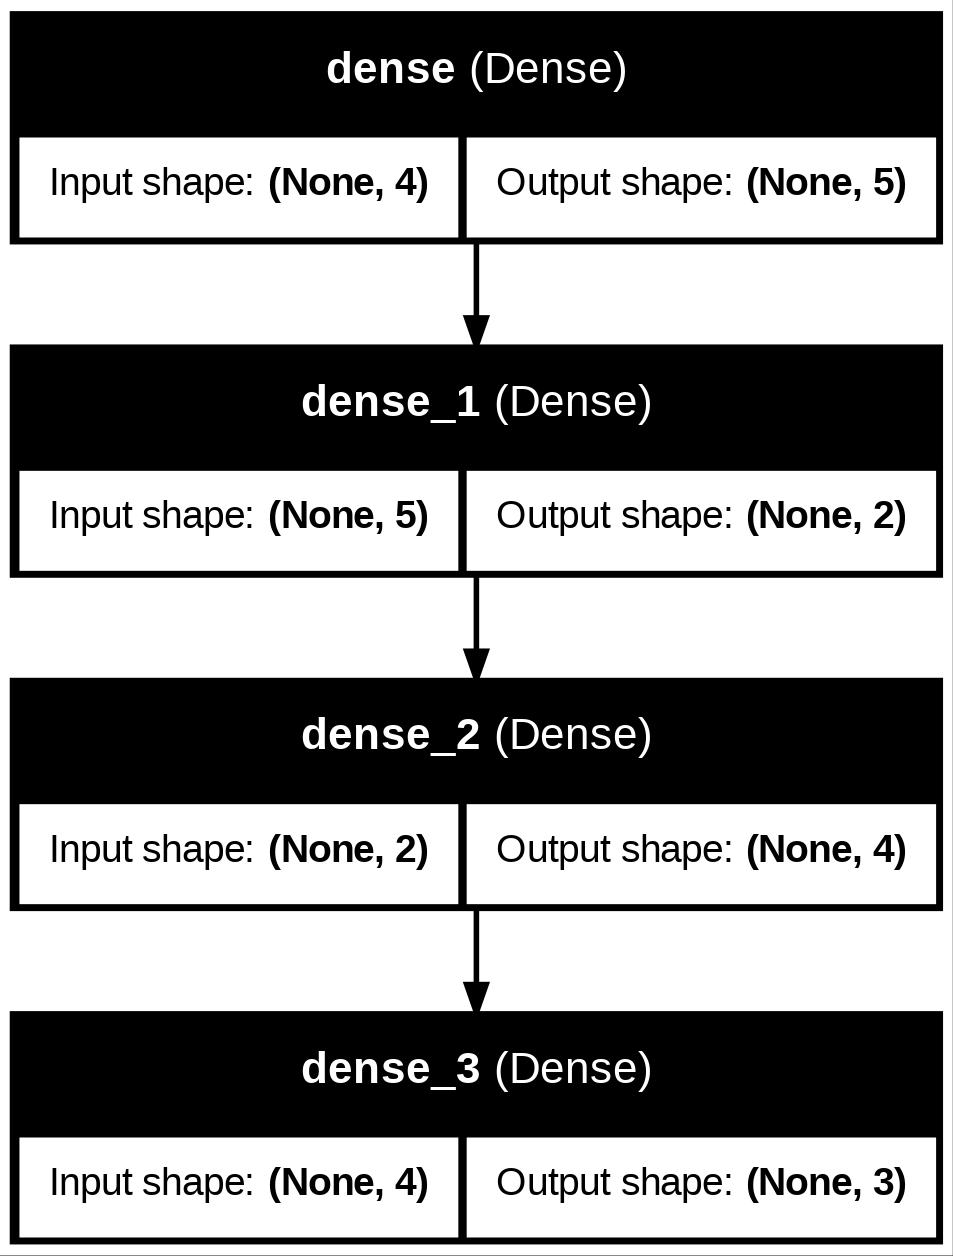

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file="model.jpeg",show_layer_names=True,show_shapes=True)

In [ ]:
x_train.shape,y_train.shape

((426, 30), (426, 2))

In [ ]:
x_train

array([[1.613e+01, 2.068e+01, 1.081e+02, ..., 2.073e-01, 3.706e-01,
        1.142e-01],
       [1.150e+01, 1.845e+01, 7.328e+01, ..., 6.544e-02, 2.740e-01,
        6.487e-02],
       [1.116e+01, 2.141e+01, 7.095e+01, ..., 4.306e-02, 2.976e-01,
        7.123e-02],
       ...,
       [1.727e+01, 2.542e+01, 1.124e+02, ..., 1.739e-01, 2.500e-01,
        7.944e-02],
       [1.702e+01, 2.398e+01, 1.128e+02, ..., 1.847e-01, 3.530e-01,
        8.482e-02],
       [2.020e+01, 2.683e+01, 1.337e+02, ..., 2.152e-01, 3.271e-01,
        7.632e-02]])

In [ ]:
model.layers[0].units = 30

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

None
